# 1. Load Data

-----

In [5]:

!pip install kagglehub[pandas-datasets]
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

- Import the location of the dataset posted on Kaggle:
https://www.kaggle.com/datasets/jonassouza872/vitoria-da-conquista-weather-data-september

In [6]:
import kagglehub
import os
# Store the path of the Kaggle dataset
path = kagglehub.dataset_download("jonassouza872/vitoria-da-conquista-weather-data-september")
# Check if the path is correct
print(path)

# List all files inside the downloaded folder
print(os.listdir(path))


Using Colab cache for faster access to the 'vitoria-da-conquista-weather-data-september' dataset.
/kaggle/input/vitoria-da-conquista-weather-data-september
['temp.csv']


In [8]:
import pandas as pd
df = pd.read_csv(f"{path}/temp.csv")  # Reads the declared path as a CSV file
df.head()  # Prints the first 5 rows of the dataset

,Timestamp,Temp_MPU6050_C,Temp_AHT20_C,Umid_AHT20_pct,Temp_BMP280_C,Press_BMP280_hPa,Temp_BMP180_C,Press_BMP180_hPa,Temp_DS18B20_C,Temp_NTC_C,Temp_DHT11_C,Umid_DHT11_pct
0,2025-08-31 22:31:02,20.86,19.90,73.37,21.28,921.24,20.19,923.02,25.69,22.26,20.03,66.0
1,2025-08-31 22:31:33,21.75,19.97,75.57,21.48,921.12,20.27,923.04,23.81,20.73,20.02,66.0
2,2025-08-31 22:32:05,21.80,19.75,74.31,21.25,921.20,20.16,923.06,22.50,20.88,20.02,67.0
3,2025-08-31 22:32:36,21.57,19.55,74.77,21.07,921.15,20.06,922.99,21.31,20.62,20.01,66.0
4,2025-08-31 22:33:07,21.66,19.60,75.09,21.12,921.25,20.06,923.02,21.88,20.95,20.00,66.0


In [9]:
df.columns #all columns

Index(['Timestamp', 'Temp_MPU6050_C', 'Temp_AHT20_C', 'Umid_AHT20_pct',
       'Temp_BMP280_C', 'Press_BMP280_hPa', 'Temp_BMP180_C',
       'Press_BMP180_hPa', 'Temp_DS18B20_C', 'Temp_NTC_C', 'Temp_DHT11_C',
       'Umid_DHT11_pct'],
      dtype='object')

# 2. Basic Exploratory Analyses.

-----

## 2.1 Descriptive Statistics by Sensor

---

- Task: Calculate mean, median, standard deviation, minimum, and maximum for each sensor.

### 2.1.1. Temperature:

In [10]:
import numpy as np
import pandas as pd

temp_sensors = ['Temp_MPU6050_C', 'Temp_AHT20_C', 'Temp_BMP280_C', 'Temp_BMP180_C',
                'Temp_DS18B20_C', 'Temp_NTC_C', 'Temp_DHT11_C']
stats = df[temp_sensors].describe() #Use the .describe() method to find the mean, median, standard deviation, minimum, and maximum
#values for each temp sensor
print(stats)


       Temp_MPU6050_C  Temp_AHT20_C  Temp_BMP280_C  Temp_BMP180_C  \
count    82430.000000  82430.000000   82430.000000   82430.000000   
mean        22.594996     20.328970      21.803339      20.729408   
std          3.504795      3.452443       3.350503       3.544005   
min         15.640000     13.440000      15.120000      13.690000   
25%         19.870000     17.610000      19.160000      17.980000   
50%         21.990000     19.750000      21.240000      20.130000   
75%         25.240000     22.990000      24.400000      23.440000   
max         31.730000     29.390000      30.590000      29.830000   

       Temp_DS18B20_C    Temp_NTC_C  Temp_DHT11_C  
count    82430.000000  82430.000000  82411.000000  
mean        20.288201     22.304208     20.164529  
std          3.445022      3.615804      3.464626  
min         13.190000     15.130000     13.060000  
25%         17.630000     19.500000     17.090000  
50%         19.690000     21.900000     20.000000  
75%         22

In [11]:
stats_table_temp = pd.DataFrame({  # create DataFrame with mean, median, standard deviation, minimum, and maximum values
    #for each temperature sensor
    'Mean (°C)': df[temp_sensors].mean(),
    'Median (°C)': df[temp_sensors].median(),
    'Std Dev (°C)': df[temp_sensors].std(),
    'Min (°C)': df[temp_sensors].min(),
    'Max (°C)': df[temp_sensors].max()
})

# Add a column with the sensor name
stats_table_temp.index.name = 'Sensor'
print("Descriptive Statistics of Temperature Sensors in Vitória da Conquista – September 2025")
print(stats_table_temp)

Descriptive Statistics of Temperature Sensors in Vitória da Conquista – September 2025
                Mean (°C)  Median (°C)  Std Dev (°C)  Min (°C)  Max (°C)
Sensor                                                                  
Temp_MPU6050_C  22.594996        21.99      3.504795     15.64     31.73
Temp_AHT20_C    20.328970        19.75      3.452443     13.44     29.39
Temp_BMP280_C   21.803339        21.24      3.350503     15.12     30.59
Temp_BMP180_C   20.729408        20.13      3.544005     13.69     29.83
Temp_DS18B20_C  20.288201        19.69      3.445022     13.19     29.44
Temp_NTC_C      22.304208        21.90      3.615804     15.13     33.01
Temp_DHT11_C    20.164529        20.00      3.464626     13.06     29.08


### 2.1.2 humidity

In [12]:
humidity_sensors = ['Umid_AHT20_pct', 'Umid_DHT11_pct']
stats_humidity = df[humidity_sensors].describe()

stats_tabble_humidity = pd.DataFrame({# create DataFrame
    'Mean (%)': df[humidity_sensors].mean(),
    'Median (%)': df[humidity_sensors].median(),
    'Std Dev (%)': df[humidity_sensors].std(),
    'Min (%)': df[humidity_sensors].min(),
    'Max (%)': df[humidity_sensors].max()
})

stats_tabble_humidity.index.name = 'Sensor'
print("Descriptive Statistics of Humidity Sensors in Vitória da Conquista – September 2025")
print(stats_tabble_humidity)

Descriptive Statistics of Humidity Sensors in Vitória da Conquista – September 2025
                 Mean (%)  Median (%)  Std Dev (%)  Min (%)  Max (%)
Sensor                                                              
Umid_AHT20_pct  65.946394       68.95    13.343084    35.44    92.13
Umid_DHT11_pct  56.830168       59.00    13.697509    19.00    85.00


### 2.1.3 pressure:

In [13]:
pressure_sensors = ['Press_BMP280_hPa', 'Press_BMP180_hPa']
stats_pressure = df[pressure_sensors].describe()

stats_tabble_pressure = pd.DataFrame({ # create DataFrame
    'Mean (hPa)': df[pressure_sensors].mean(),
    'Median (hPa)': df[pressure_sensors].median(),
    'Min (hPa)': df[pressure_sensors].min(),
    'Max (hPa)': df[pressure_sensors].max()
    })

stats_tabble_pressure.index.name = 'Sensor'
print("Descriptive Statistics of Pressure Sensors in Vitória da Conquista – September 2025")
print(stats_tabble_pressure)

Descriptive Statistics of Pressure Sensors in Vitória da Conquista – September 2025
                  Mean (hPa)  Median (hPa)  Min (hPa)  Max (hPa)
Sensor                                                          
Press_BMP280_hPa  918.146819        918.30     912.10     922.99
Press_BMP180_hPa  920.040437        920.21     914.48     924.35


## 2.2. Data Distribution Graphs

-----

### 2.2.1 Temperature:

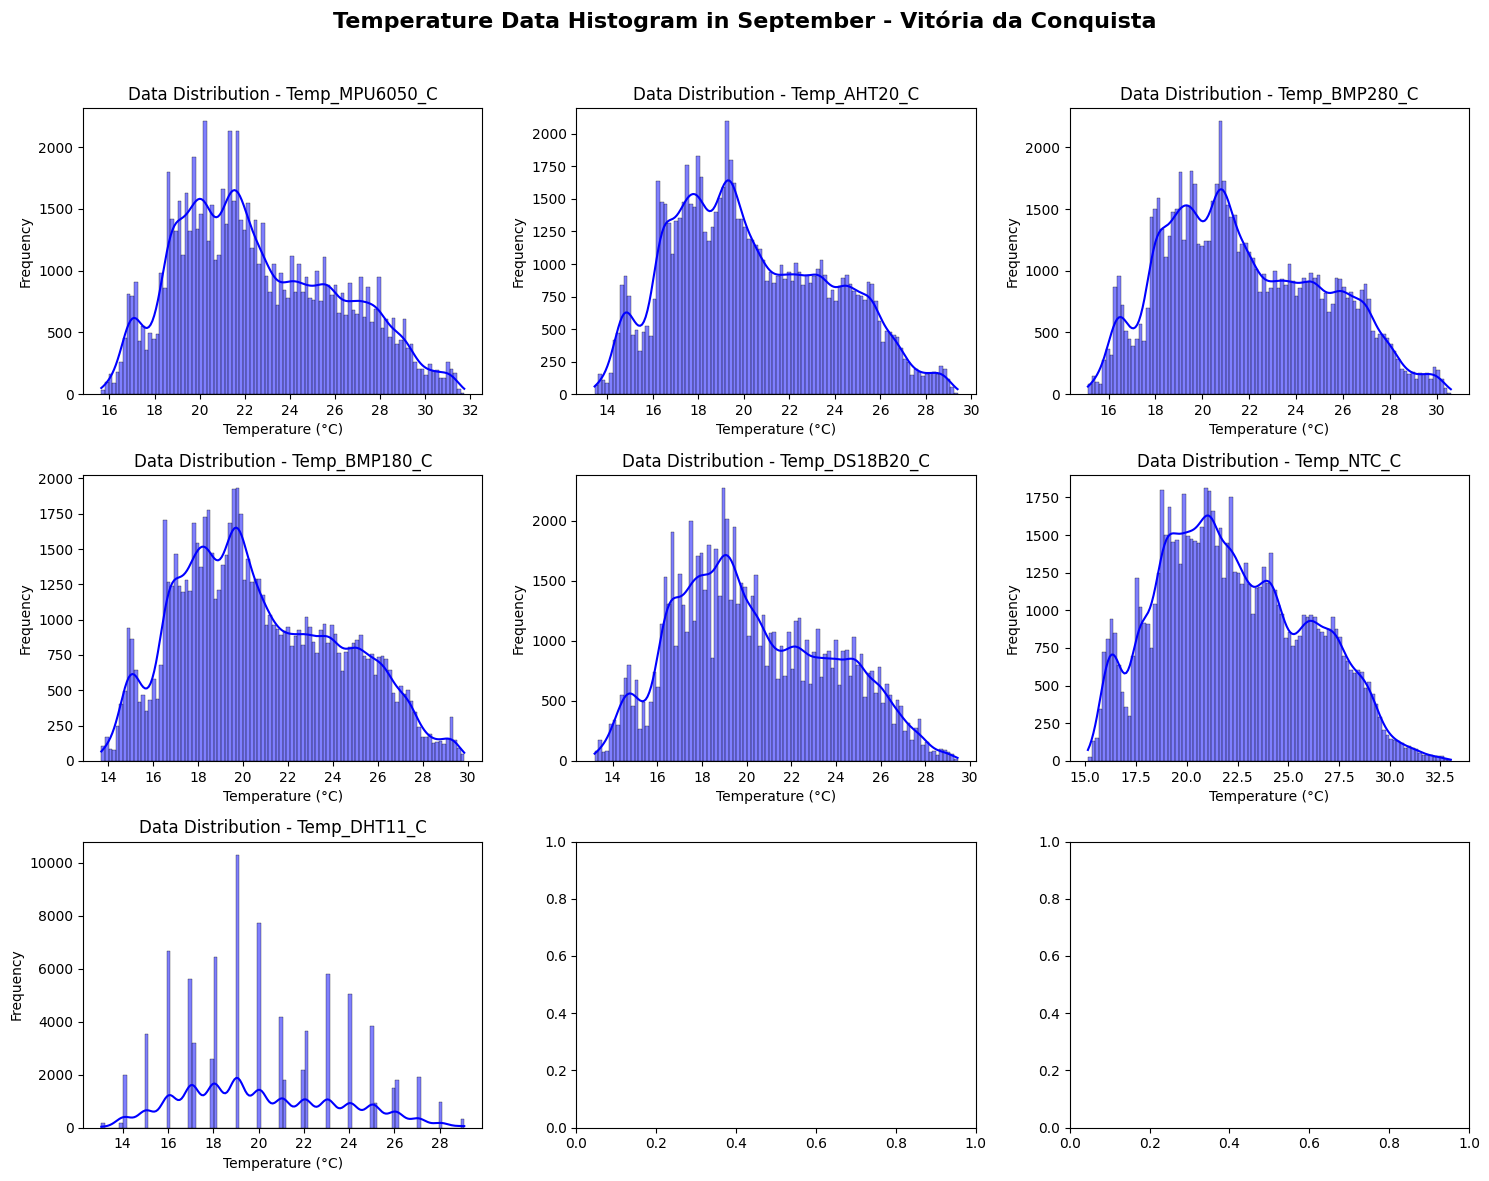

In [49]:
# Plot all histograms for all temperature sensors
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 9 graphs (3x3)
for i, sensor in enumerate(temp_sensors):
    ax = axes[i // 3, i % 3]  # access by row and column
    sns.histplot(df[sensor], bins=100, kde=True, ax=ax, edgecolor='black', color='blue')  # Histogram with KDE line
    ax.set_title(f'Data Distribution - {sensor}')
    ax.set_xlabel('Temperature (°C)')
    ax.set_ylabel('Frequency')

fig.suptitle('Temperature Data Histogram in September - Vitória da Conquista', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # adjust layout to fit title
plt.show()


Analyzing the temperature distributions from all 7 sensors, most exhibit approximately normal behavior with peaks between 20-22°C, reflecting the characteristic tropical highland climate of the region. The DHT11 sensor shows a clearly anomalous pattern with multiple discrete peaks, indicating low reading resolution (quantization) and lower precision compared to other sensors, while sensors like BMP280, BMP180, and AHT20 display smoother and more reliable distributions.

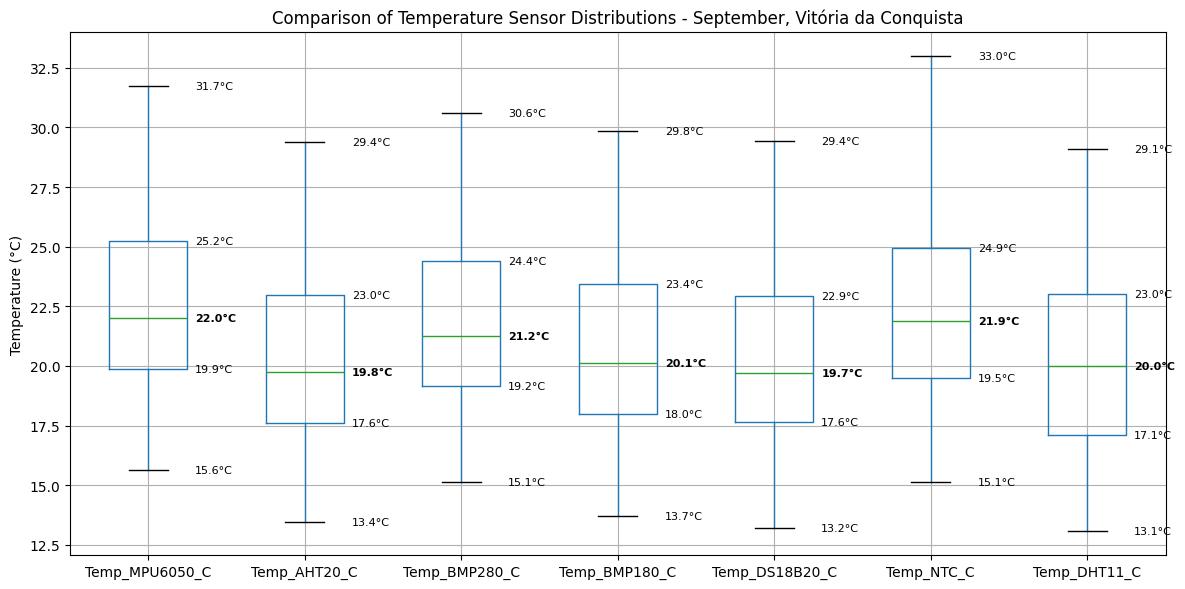

In [26]:
# Comparing temperature data from each sensor via boxplot
# Comparative Box Plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
df[temp_sensors].boxplot(ax=ax)

# Add annotations for Q1, Q2 (median), and Q3
for i, sensor in enumerate(temp_sensors, 1):
    q1 = df[sensor].quantile(0.25) #25%
    median = df[sensor].quantile(0.50) # 50%
    q3 = df[sensor].quantile(0.75) # 75%
    min_val = df[sensor].min()
    max_val = df[sensor].max()

    ax.text(i + 0.3, q3, f'{q3:.1f}°C', fontsize=8, va='center')# Annotate Q3 (upper)
    ax.text(i + 0.3, median, f'{median:.1f}°C', fontsize=8, va='center', fontweight='bold') # Annotate median (center)
    ax.text(i + 0.3, q1, f'{q1:.1f}°C', fontsize=8, va='center') # Annotate Q1 (lower)
    ax.text(i + 0.3, max_val, f'{max_val:.1f}°C', fontsize=8, va='center') # Annotate max
    ax.text(i + 0.3, min_val, f'{min_val:.1f}°C', fontsize=8, va='center') # Annotate min

plt.ylabel('Temperature (°C)')
plt.title('Comparison of Temperature Sensor Distributions - September, Vitória da Conquista')
plt.tight_layout()
plt.show()

The boxplot comparison reveals that all temperature sensors show similar median values (19.8-22.0°C) and interquartile ranges (Q1: 17.6-20.1°C, Q3: 22.9-25.2°C), indicating good overall agreement between sensors. However, the NTC thermistor displays the widest range with extreme outliers reaching 33°C, while the DHT11 shows a narrower distribution, likely due to its lower resolution and quantization effects observed in the histogram analysis.

### 2.2.2. Humidity

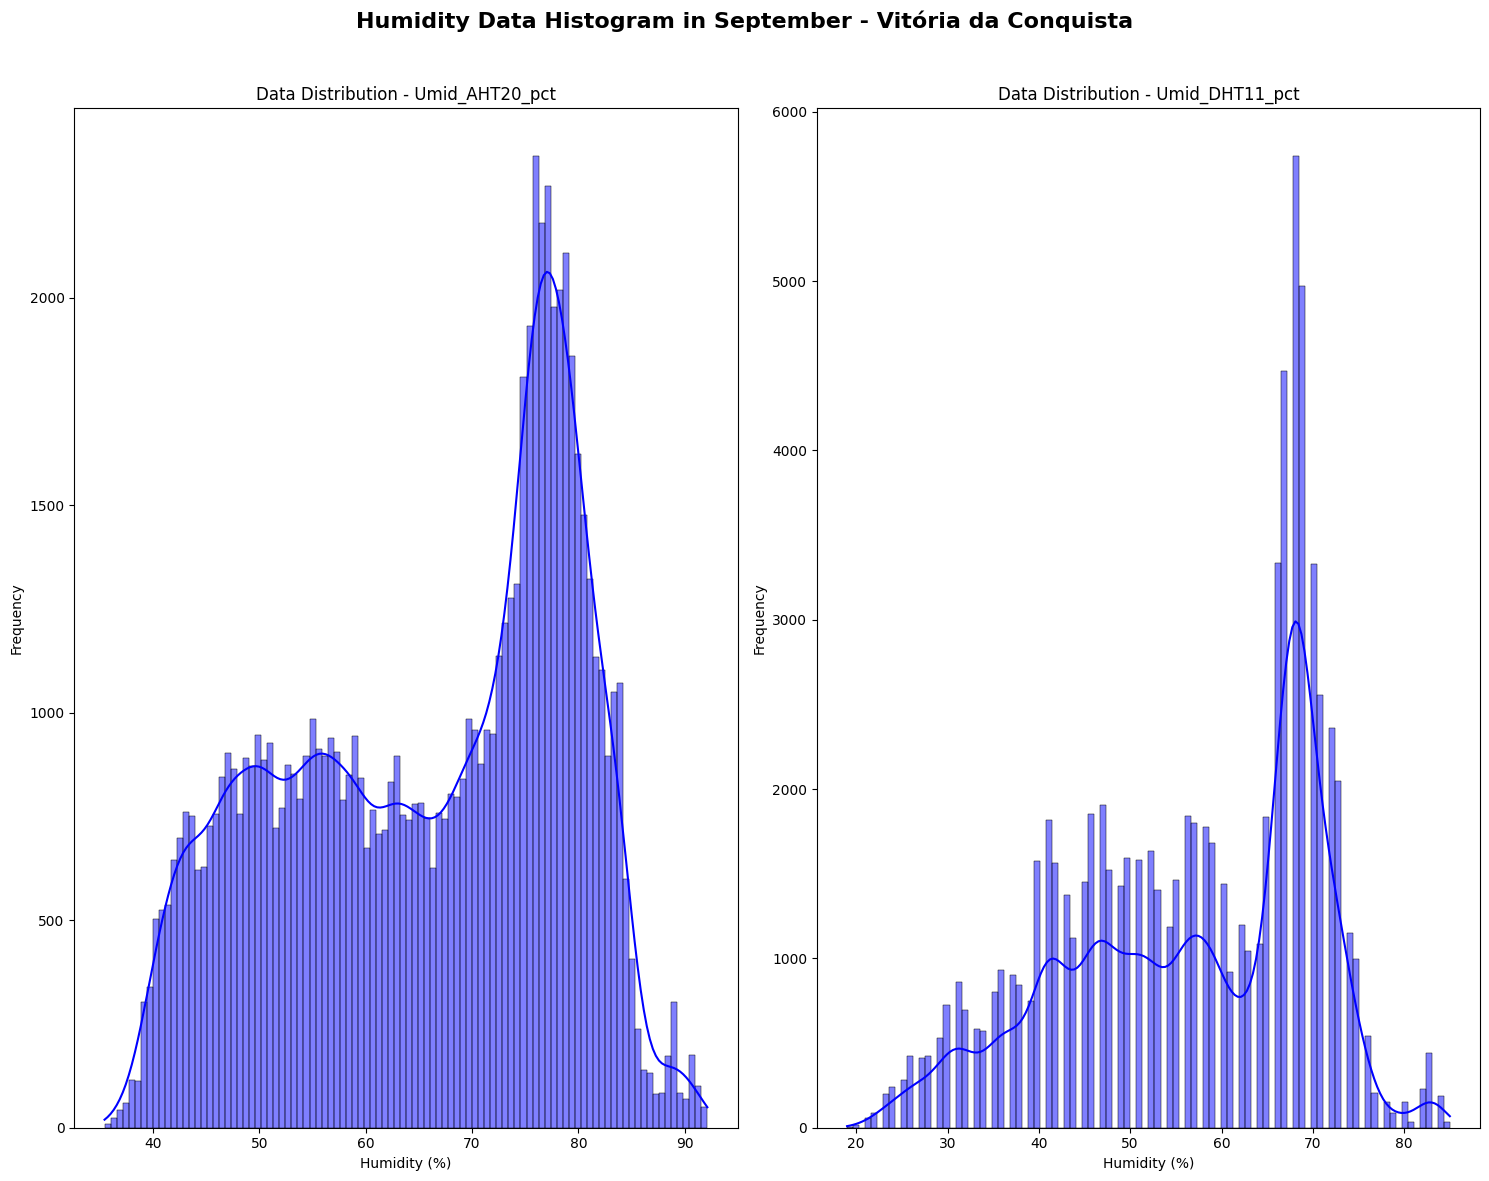

In [31]:
# Plot all histograms for all Humidity sensors
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(15, 12))  # 2 graphs (1x2)
for i, sensor in enumerate(humidity_sensors):
    ax = axes[i]
    sns.histplot(df[sensor], bins=100, kde=True, ax=ax, edgecolor='black', color='blue')  # Histogram with KDE line
    ax.set_title(f'Data Distribution - {sensor}')
    ax.set_xlabel('Humidity (%)')
    ax.set_ylabel('Frequency')

fig.suptitle('Humidity Data Histogram in September - Vitória da Conquista', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # adjust layout to fit title
plt.show()


The humidity histograms reveal a bimodal distribution for both sensors, with the AHT20 showing a prominent peak around 75-80% and a secondary cluster around 50-55%, while the DHT11 displays similar patterns but with more pronounced quantization due to its lower resolution. This bimodal behavior is consistent with September's weather patterns in Vitória da Conquista, where frequent nighttime fog and mist events drove humidity levels above 70%, contrasting sharply with drier afternoon conditions when temperatures peaked and humidity dropped significantly.

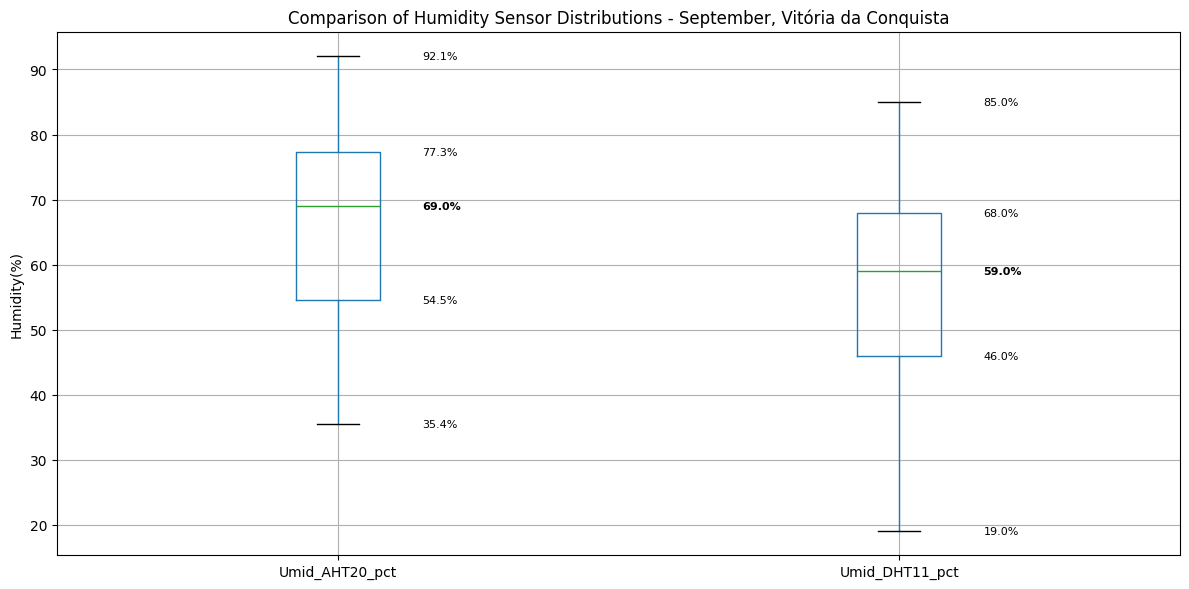

In [38]:
# Comparing Humidity data from each sensor via boxplot
# Comparative Box Plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
df[humidity_sensors].boxplot(ax=ax)

# Add annotations for Q1, Q2 (median), and Q3
for i, sensor in enumerate(humidity_sensors, 1):
    q1 = df[sensor].quantile(0.25) #25%
    median = df[sensor].quantile(0.50) # 50%
    q3 = df[sensor].quantile(0.75) # 75%
    min_val = df[sensor].min()
    max_val = df[sensor].max()

    ax.text(i + 0.15, q3, f'{q3:.1f}%', fontsize=8, va='center')# Annotate Q3 (upper)
    ax.text(i + 0.15, median, f'{median:.1f}%', fontsize=8, va='center', fontweight='bold') # Annotate median (center)
    ax.text(i + 0.15, q1, f'{q1:.1f}%', fontsize=8, va='center') # Annotate Q1 (lower)
    ax.text(i + 0.15, max_val, f'{max_val:.1f}%', fontsize=8, va='center') # Annotate max
    ax.text(i + 0.15, min_val, f'{min_val:.1f}%', fontsize=8, va='center') # Annotate min

plt.ylabel('Humidity(%)')
plt.title('Comparison of Humidity Sensor Distributions - September, Vitória da Conquista')
plt.tight_layout()
plt.show()

The humidity boxplot comparison shows that both sensors capture similar median values (AHT20: 69.0% vs DHT11: 59.0%), but the AHT20 displays a more compact interquartile range (54.5-77.3%) with fewer extreme outliers, while the DHT11 exhibits a wider spread (46.0-68.0%) and more pronounced outliers reaching up to 85%, suggesting the AHT20 provides more consistent and reliable humidity measurements. The higher median in the AHT20 better captures the frequent nighttime fog conditions, whereas the DHT11's lower median and greater variability may reflect its inferior sensor precision and response time to rapid humidity changes.

### 2.2.3. Pressure


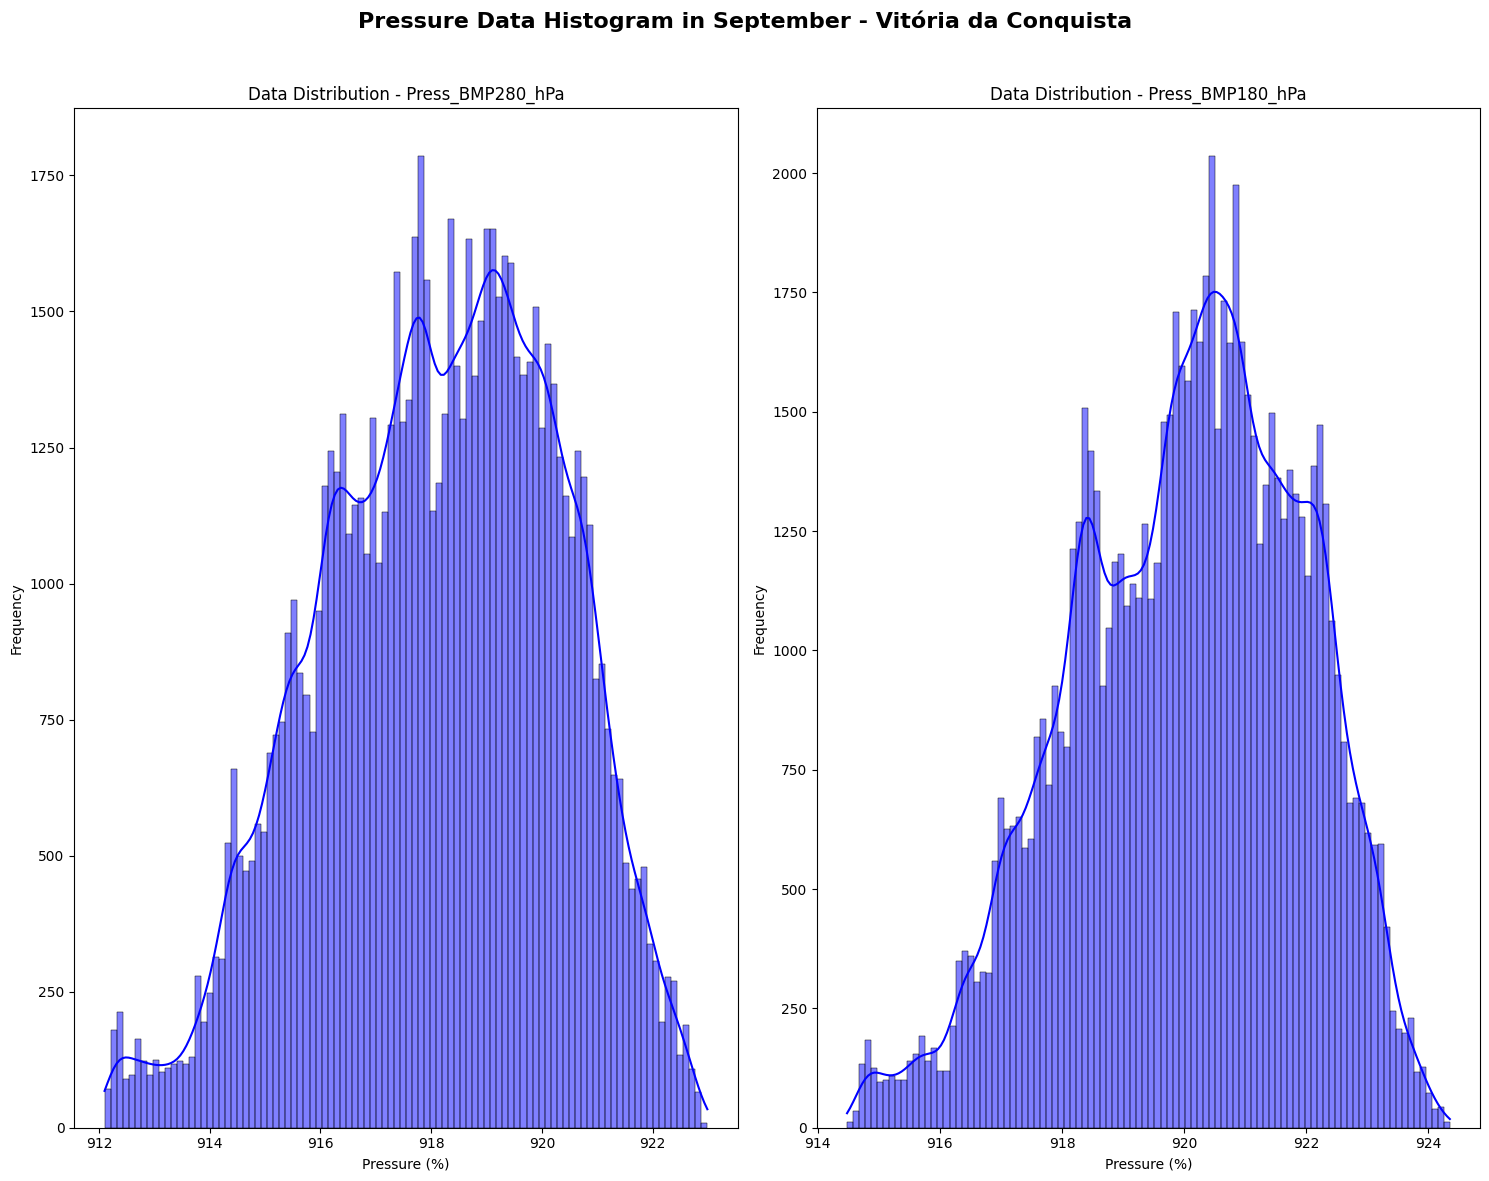

In [34]:
# Plot all histograms for all Pressure sensors
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(15, 12))  # 2 graphs (1x2)
for i, sensor in enumerate(pressure_sensors):
    ax = axes[i]
    sns.histplot(df[sensor], bins=100, kde=True, ax=ax, edgecolor='black', color='blue')  # Histogram with KDE line
    ax.set_title(f'Data Distribution - {sensor}')
    ax.set_xlabel('Pressure (%)')
    ax.set_ylabel('Frequency')

fig.suptitle('Pressure Data Histogram in September - Vitória da Conquista', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # adjust layout to fit title
plt.show()


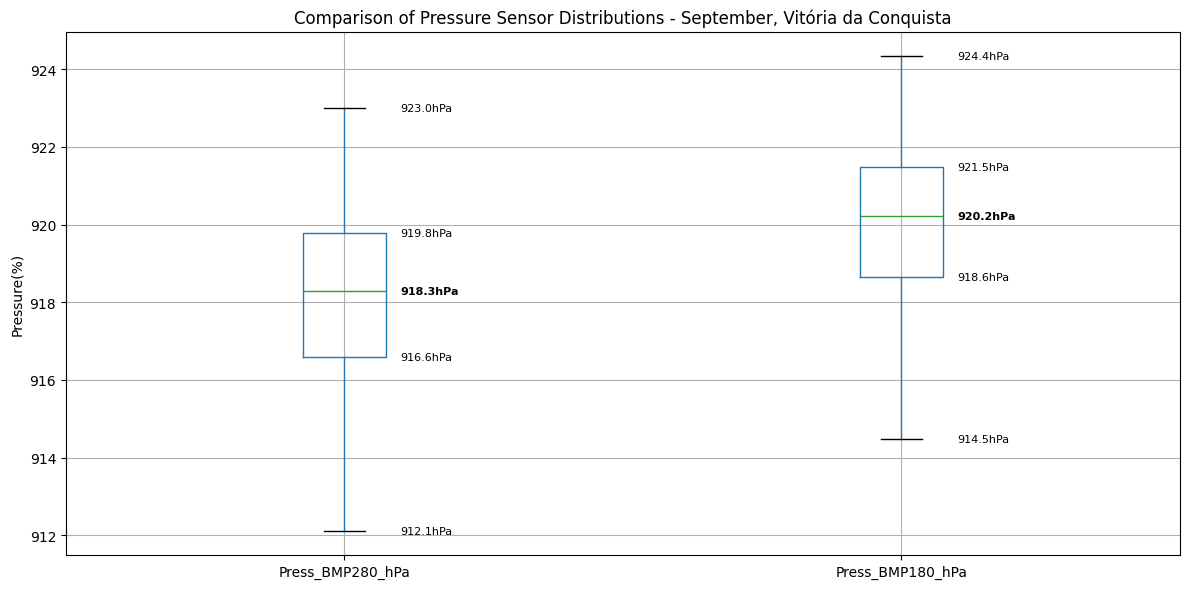

In [40]:
# Comparing Pressure data from each sensor via boxplot
# Comparative Box Plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
df[pressure_sensors].boxplot(ax=ax)

# Add annotations for Q1, Q2 (median), and Q3
for i, sensor in enumerate(pressure_sensors, 1):
    q1 = df[sensor].quantile(0.25) #25%
    median = df[sensor].quantile(0.50) # 50%
    q3 = df[sensor].quantile(0.75) # 75%
    min_val = df[sensor].min()
    max_val = df[sensor].max()

    ax.text(i + 0.1, q3, f'{q3:.1f}hPa', fontsize=8, va='center')# Annotate Q3 (upper)
    ax.text(i + 0.1, median, f'{median:.1f}hPa', fontsize=8, va='center', fontweight='bold') # Annotate median (center)
    ax.text(i + 0.1, q1, f'{q1:.1f}hPa', fontsize=8, va='center') # Annotate Q1 (lower)
    ax.text(i + 0.1, max_val, f'{max_val:.1f}hPa', fontsize=8, va='center') # Annotate max
    ax.text(i + 0.1, min_val, f'{min_val:.1f}hPa', fontsize=8, va='center') # Annotate min

plt.ylabel('Pressure(%)')
plt.title('Comparison of Pressure Sensor Distributions - September, Vitória da Conquista')
plt.tight_layout()
plt.show()

The pressure sensor comparison demonstrates excellent agreement between the BMP280 and BMP180, with nearly identical median values (918.3 hPa vs 920.2 hPa) and similar interquartile ranges (916.6-919.8 hPa vs 918.6-921.5 hPa), confirming the sensors' reliability and consistency. Both sensors show a narrow distribution with minimal outliers, reflecting the stable atmospheric pressure typical at Vitória da Conquista's 923-meter elevation, with the BMP180 displaying a slightly wider range (914.5-924.4 hPa) compared to the BMP280 (912.1-923.0 hPa), likely capturing subtle pressure variations associated with weather system passages during the month.

## 2.3. Conclusion


----

The PolySense Station successfully captured the characteristic tropical highland climate of Vitória da Conquista during September 2025, with temperature ranges of 13-33°C (median ~20-22°C) and atmospheric pressure readings of 915-924 hPa consistent with the city's 923-meter elevation. The most striking finding is the bimodal humidity distribution, with peaks at 50-55% (daytime) and 75-80% (nighttime), perfectly reflecting September's frequent nocturnal fog formation - a typical phenomenon during the late dry season when clear skies cause strong radiative cooling and condensation. The multi-sensor redundancy proved essential for validation, with high-precision sensors (BMP280, AHT20, DS18B20) showing excellent agreement and smooth distributions, while the DHT11 displayed clear quantization limitations. The strong diurnal temperature amplitude (10-12°C) and stable pressure readings confirm the typical behavior of continental highlands during the austral winter-to-spring transition. Overall, the dataset provides a comprehensive 30-day snapshot of micrometeorological patterns in Brazil's highland interior.